In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_train = pd.read_csv("train_logs.csv")
df_train_labels = pd.read_csv("train_scores.csv")

In [94]:
df_train.head(n = 5)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


**Literature Review**


Best known accuracy: 0.582 is the best known Root Mean Squared Error. The approach was using an LGBMRegressor to do the model fitting with hyperparameter optimization on n_estimators. First, the essay was constructed using logic from the predictor variables. The feature engineering invovled using sentence and paragraph aggregations and utilizing activity and event counts and creating variables such as largest_lantency, smallest_lantency, median_lantncy, initial_pause, pauss_half_sec, word_time ratio, and event_time ratio variables, and more. The main crux of this approach was to recreate the essay, extract new sentence and paragraph features from the constructed essay, and to utilize the other common feature engineering approaches such as activity and event and text change counts. 


Other Approaches:

1. One approach consisted of the introduction of sentence and paragraph features in feature engineering. First, the approach consisted of constructing the essays from the predictor variables, spliting them into sentences and paragraphs, count the characters and words in the sentencs and paragraphs, and computd aggrgations (e.g, number of sentences, number of paragraphs, mean sentence lenghts). The advantage of this approach was that the feature importance plot revealed that many of these sentences and paragraph features are indeed important in predicting the outcome variable. However, one of the disadvantages could be that it is quite computationally expensive and takes more time for model to train and do the initial data preprocessing.  

2. Another approach did not invovle advanced analysis of recreating sentences and paragraph aggregation from the essays. Instead, it simply analyzed the specific frequencies of the counts of the predictors such as activity and text change. It also considered distribution of text after replacement and most common text changes. Analyzing associations was done mostly through exploratory data analysis and through plots and visualizations. One advantage of this approach is it more computationally efficient than the approach in 1 because it doesn't do advanced data preprocessing. However, this could mean that certain variables that are more predictive in determing score variable could be left out. 

Many of these advanced feature engineering approaches utilized the idea of constructing the essay from the predictor variables and extracting more features from the constructed essay. Additionally, many of the notebooks had a lot of the common engineered features such as specific activity or text change counts. Other approaches also included natural language processing techniques such as word2vec to create and represent word embeddings.


Citations and Links:

https://www.kaggle.com/code/yongsukprasertsuk/writing-processes-to-quality-0-584

https://www.kaggle.com/code/prashantkumarsundge/linking-writing-processes-to-writing-quality

https://www.kaggle.com/code/chuboy/simple-essay-reconstructor

https://www.kaggle.com/code/yuriao/fast-essay-constructor

https://www.kaggle.com/code/suraj520/word2vec-voting-gpu-k-fold-cv-optuna


Application to your Project: From reviewing these approaches, I can implement a few of these practices in this project. First, I am going to implement feature engineering in this project, which is a technique to create new variables using existing variables that are better associated with the target variable. I am going to implement some of the features that were in the literature review and present in the approaches in the other notebooks. Specifically, the features involving activity_nonproduction_count, activity_input_count, and further splitting up activity variable as well as the count of text change values will be considered. Additionally, I will implement correlation matrices and pairwise plots that was also seen during the literature review process of analyzing the relationship between some of the predictors and the target variable. 


**Project Description and Summary**

This analysis will use process features from keystroke log data to predict overall writing quality. These efforts may identify relationships between learners’ writing behaviors and writing performance. Ultimately, this may help direct learners’ attention to their text production process and boost their autonomy, metacognitive awareness, and self-regulation in writing. 

Project Goal: The overall goal of the project is to train and build machine learning models to accurately predict overall writing quality and identify the relevant features and what predictors are more important in overall writing quality from interpreting the models. 

Project Approach: This project encompasses of the following steps.

1. Data Preprocessing: This invovles using feature engineering to generate new variables that are correlated to predicting the score variable. Utilizing some of the variables in the other kaggle notebooks as well as using reasoning regarding the most influential variables in writing quality, we will do an initial selection of the variables. We will perform exploratory data analysis including generating correlation matrices and pairwise plots to select variables that are closely associated with the target score variable. The variables that

Feature engineering is one of the concepts that was not covered in class, but that is utilized extensively in this notebook to generate relevant features. Feature engineering is the process of creating new variables from existing features that are helpful in predicting the target score variable. In this project, we are utilizing feature engineering by extracting certain characteristics of variables to use in the training data to fit the model. Specifically, we will be using counts of certain values in the variables and will extract this information through an aggregation. This helps train the model on variables that are more associated and contain more information to help predict the score variable. 

2. Regression and Classification Models: We will implement ridge regression, support vector machines, and random forest regression. This process will include the following:

    1. Hyperparameter tuning: Find the optimal parameters for each of the model. For ridge regression, it is the optimal lambda regularization parameter. For support vector machines, it is the optimal C regularization parameter. For random forest, the parameters n_estimators, max_depth, min_samples_split, min_samples_leaf were involved in the hyperparameter tuning process. 

    2. Training the model: Each of the models will be trained with the appropriate hyperparameters and will be fit to the training data. Random forest regression and ridge regression were models covered in this course. However, support vector regression is a model that builds off the support vector classification model that was taught in the course. Support Vector regression seeks to find a hyperplane that best fits the data points in a continous space. 

    3. Evaluating the model: The models will be evaluated using Root Mean Squared Error. R squared will also be utilized and it is a measure of how much of the variance in y can be explained by the predictor variables. R squared can be used as a goodness of fit measure and is commonly used throughout the literature. 

    4. Interpreting the model results: Using feature importances and model coefficients, we are trying to extract how the model is associating the featuers to the target variable. It helps answer questions such as which features is the model using heavily? 

Project Conclusion: After evaluating the models, the support vector machine regressor model with hyperparameter C of 2 had the highest performance as it resulted in the lowest RMSE value and highest R squared value. Combining the model interpretations, the variables input_count and q_count provided great information in predicting the score of the target variable. 

**Data Preprocessing**

First we will identify the features that are most correlated with and are most relevant to identifying the score variable. We will generate correlation plots to identify these features and then finally create a date preprocessing function that will convert the events into a single row for the score. 

We do not need to process null values as we see that there are no missing values in the dataset. 

In [95]:
df_train.isnull().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

We need to identify possible features to extract in our final condensed dataframe where we condense all the events for a single id into one row. We will check which possible features to include in the model through a correlation matrix of some possible features. 

Below is the reasoning behind many of the features that are selected and detailed guide in the approach of selecting these variables:

Number of events represent the number of changes that have occurred in the essay and it is reasonable to anticipate the quantity of edits to have an effect on the quality of the essay. 

The time to write the essay may also have an influence on the quality of the essay. It's reasonable to expect better essays to take longer duration in general.

The number of words also could reflect upon the quality of the essay. More words may mean that more ideas and thoughts are present in the essay, perhaps leading to a better overall essay. 

Activity NonProduction, Activity Input, Activity RemoveCut, Activity Paste, Activity Replace counts - these were the most common values in activity and were use heavily in the other notebooks during literature review. 

Text change - q count, nochange, and blank count were also the most common values in the text change column and were used by other approaches on kaggle. 

These are just potential features that we are using. There will be additional testing to see if they actually related to the target score variable. 

We will now perform some feature engineering to create these new variables. 

In [96]:
grouped = df_train.groupby("id")
events_count = list(grouped.agg("count").reset_index()["event_id"])
duration_sum = list(grouped.agg("sum").reset_index()["action_time"])
word_count = list(grouped.agg("max").reset_index()["word_count"])

activity_nonproduction_count = list(grouped["activity"].apply(lambda row: (row=="Nonproduction").sum()))
activity_input_count = list(grouped["activity"].apply(lambda row: (row=="Input").sum()))
activity_removecut_count = list(grouped["activity"].apply(lambda row: (row=="Remove/Cut").sum()))
activity_paste_count = list(grouped["activity"].apply(lambda row: (row=="Paste").sum()))
activity_replace_count = list(grouped["activity"].apply(lambda row: (row=="Replace").sum()))

texchange_q_count = list(grouped["text_change"].apply(lambda row: (row=="q").sum()))
textchange_nochange_count = list(grouped["text_change"].apply(lambda row: (row=="NoChange").sum()))
textchange_blank_count = list(grouped["text_change"].apply(lambda row: (row==" ").sum()))

cursor_position_mean = list(grouped.agg("mean").reset_index()["cursor_position"])
cursor_position_max = list(grouped.agg("max").reset_index()["cursor_position"])

In [97]:
combined_dataframe = pd.DataFrame()
combined_dataframe["Events_Count"] = events_count
combined_dataframe["Total_Duration"] = duration_sum
combined_dataframe["Word_Count"] = word_count

combined_dataframe["Nonproduction_Count"] = activity_nonproduction_count
combined_dataframe["Removecut_Count"] = activity_removecut_count
combined_dataframe["Paste_Count"] = activity_paste_count
combined_dataframe["Replace_Count"] = activity_replace_count
combined_dataframe["Input_Count"] = activity_input_count

combined_dataframe["q_count"] = texchange_q_count
combined_dataframe["nochange_count"] = textchange_nochange_count
combined_dataframe["blank_count"] = textchange_blank_count

combined_dataframe["cursorpositionmax"] = cursor_position_max
combined_dataframe["cursorpositionmean"] = cursor_position_mean

combined_dataframe["score"] = list(df_train_labels["score"])
combined_dataframe


,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean,score
0,2557,297243,256,120,417,0,7,2010,1940,120,436,1539,711.163473,3.5
1,2454,275391,323,254,260,1,1,1938,1698,254,432,1676,776.205786,3.5
2,4136,421201,404,175,439,0,7,3515,3257,175,615,2291,731.611702,6.0
3,1556,189596,206,99,151,1,1,1304,1146,99,281,1047,542.537275,2.0
4,2531,313702,252,72,517,0,0,1942,1964,72,397,1402,600.050968,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,4739,499670,461,189,960,0,2,3588,3605,189,813,1634,774.000633,3.5
2467,2604,214221,438,148,60,0,1,2395,1920,148,457,1877,1022.078725,4.0
2468,3063,231580,201,126,88,0,0,2849,1031,126,1879,2761,1309.085537,1.5
2469,3242,289439,413,71,276,0,0,2895,2593,71,490,2133,1192.640962,5.0


In [98]:
combined_dataframe.describe()

,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean,score
count,2471.000000,2.471000e+03,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,3401.820316,3.336675e+05,389.966410,284.844597,392.617564,0.242412,1.800081,2722.297046,2480.051801,284.844597,557.195063,2232.188183,1056.733046,3.711251
std,1578.850387,1.575202e+05,172.455317,503.533243,332.907812,1.203200,3.629347,1196.384644,1151.715843,503.533243,286.537368,969.507385,456.327157,1.024937
min,262.000000,1.345200e+04,35.000000,2.000000,0.000000,0.000000,0.000000,230.000000,211.000000,2.000000,38.000000,207.000000,113.709924,0.500000
25%,2193.500000,2.111480e+05,255.000000,77.000000,166.000000,0.000000,0.000000,1786.000000,1573.000000,77.000000,358.000000,1487.500000,717.305957,3.000000
50%,3082.000000,3.049510e+05,351.000000,132.000000,299.000000,0.000000,0.000000,2477.000000,2248.000000,132.000000,501.000000,1993.000000,938.083255,4.000000
75%,4301.000000,4.248140e+05,480.000000,284.000000,521.500000,0.000000,2.000000,3397.500000,3162.500000,284.000000,686.000000,2758.500000,1289.744955,4.500000
max,12876.000000,1.210508e+06,1326.000000,6100.000000,4567.000000,37.000000,42.000000,9091.000000,10067.000000,6100.000000,4283.000000,7802.000000,3734.246700,6.000000


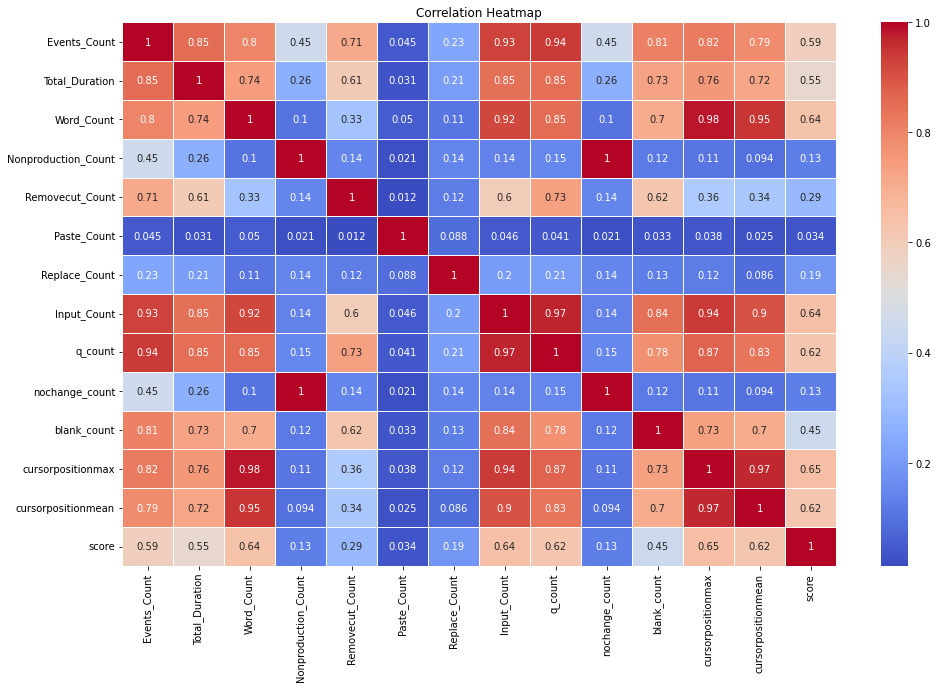

In [8]:
# Calculate the correlation matrix
correlation_matrix = combined_dataframe.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From the above correlation matrix, we see that there are many variables that have moderate correlation to the score variable. This means that it is possible that those variables can help us determining score and could potentially be useful in our model. The variables that have a moderately strong correlation with score are the following:

1. Number of events

2. Total duration

3. Word Count

4. Input Count

5. q_count

6. Cursorpositionmax

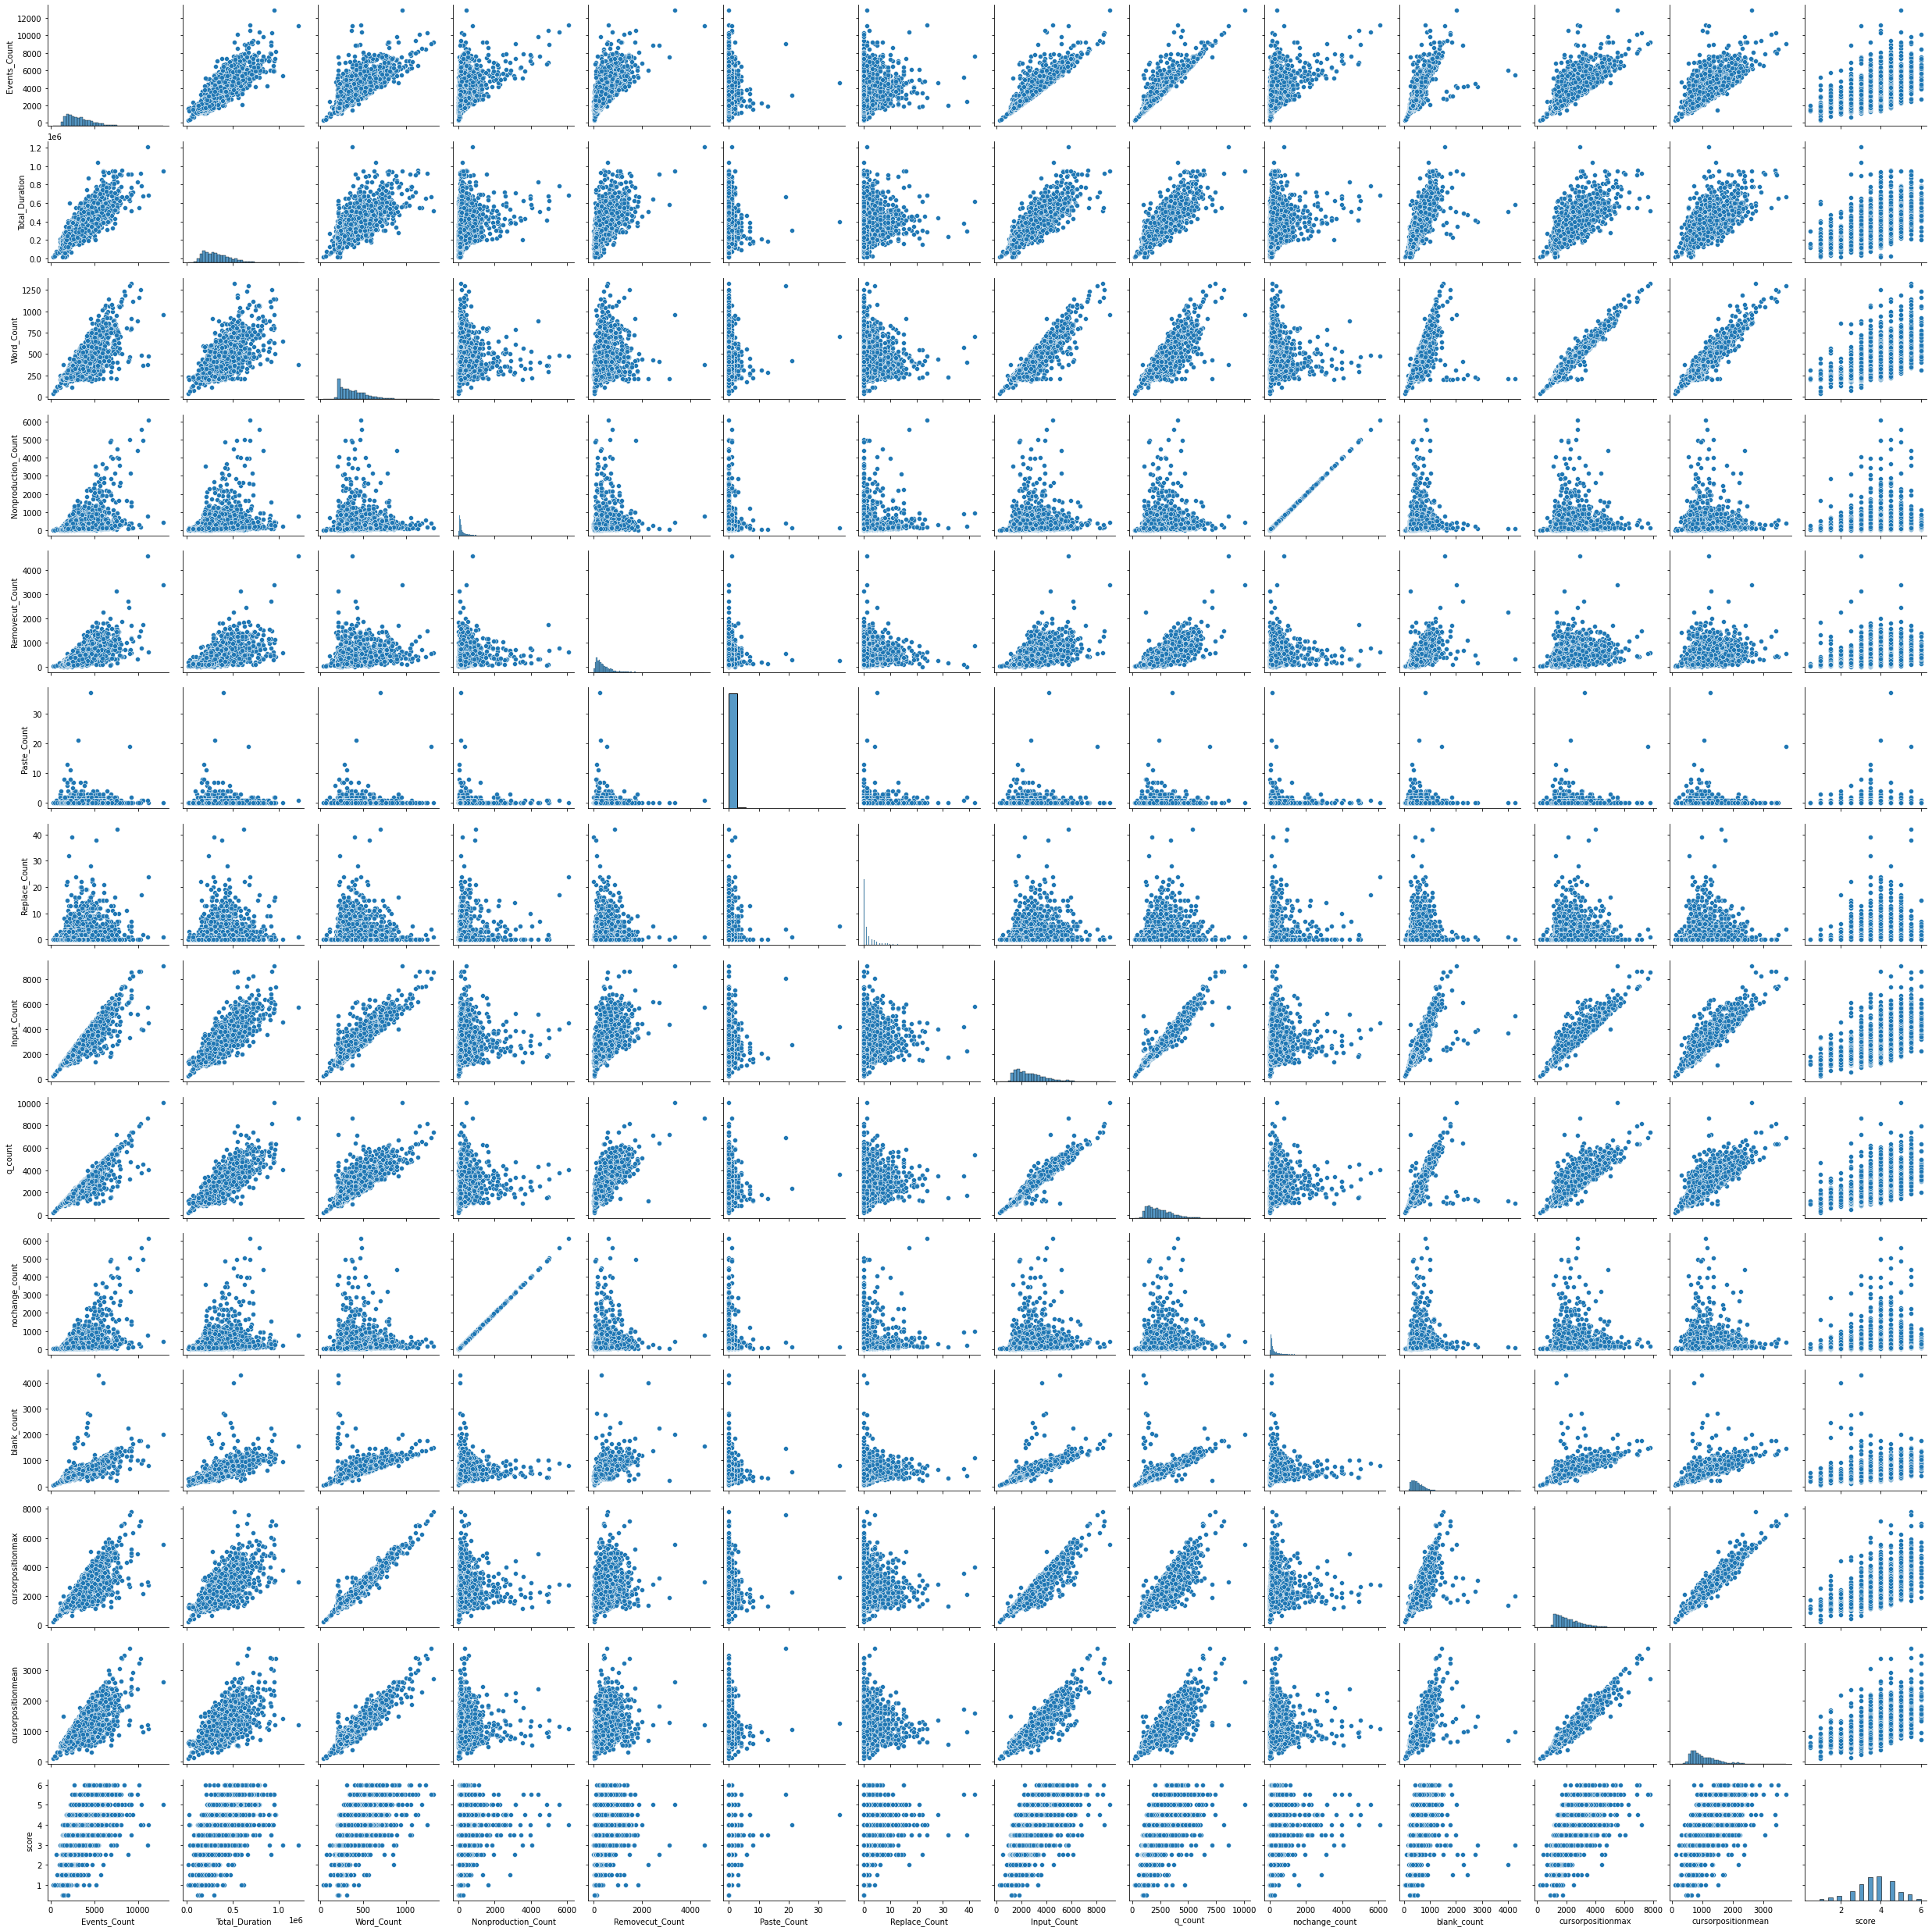

In [ ]:
sns.pairplot(combined_dataframe)

From these pairwise plots, when looking at them from a broader lens, it does not appear that there are many outliers in the dataset in general, so we will not take action to process and identify them. 

In [ ]:
combined_dataframe.describe()

In [ ]:
combined_dataframe.describe()

NameError: name 'combined_dataframe' is not defined

**Unsupervised Learning**

We will utilize K means clustering algorithm and hierarchical clustering algorithms to identify possible clusters in the dataset. For K means, in order to identify the optimal K, we shall utilize the elbow plot method. 

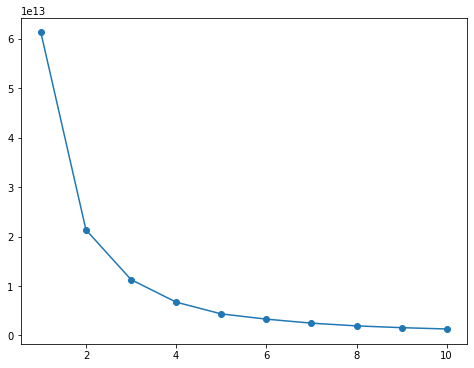

In [ ]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(combined_dataframe.drop('score', axis=1))
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')

It appears that K = 2 looks like optimal number of clusters

12 clusters 

In [ ]:
#Apply K means clustering algorithm with k = 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(combined_dataframe.drop('score', axis=1))

KMeans(n_clusters=2, random_state=42)

We will use PCA to visualize the clusters and the scores in the dataset to check for any association or relationship between the clusters and scores. 

**Regression and Classification Models**

1. Ridge Regression

We will utilize Ridge regression because we have high dimensionality with some correlated features. Additionally, we have already selected some features in our model, so we do not necessarily want the model to eliminate certain features (which could be the case in Lasso regression). As a result, we will utilize Ridge Regression. We also want this model to perform well on unseen data (for the Kaggle competition) and reduce overfitting (bias). This can be achieved through the regularization penalty in ridge regression. 

We will perform parameter tuning for the lambda in ridge regression and select the optimal lambda to use in the model. 

Standardization ensures that all the features have the same scale, which is important for Ridge Regression because the regularization term in the Ridge Regression cost function is sensitive to the scale of the features. Standardizing the features also makes the coefficients directly comparable in terms of their magnitude. This aids in the interpretation of the model because the coefficients represent the change in the target variable associated with a one-unit change in the standardized feature.

Standardization will also help interpretibility because 

As a result, in this ridge regression model we will make sure to standardize the features. 

In [22]:
X = combined_dataframe.drop("score", axis=1)
y = combined_dataframe["score"]

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Optimal lambda:  200
R-squared (R2): 0.5141078124706779
Root Mean Squared Error: 0.68820069729888


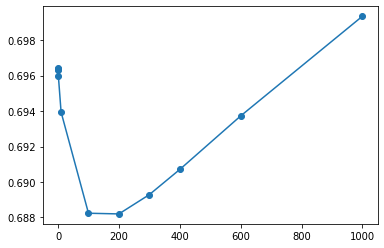

In [ ]:
# Define a range of lambda values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 600, 1000]

# Initialize lists to store results
rmse_scores = []

for val in lambda_values:
    ridge = Ridge(alpha=val)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

plt.plot(lambda_values, rmse_scores, marker='o')
optimal_index = np.argmin(rmse_scores)
optimal_lambda = lambda_values[optimal_index]
print("Optimal lambda: ", optimal_lambda)

#Fit ridge regression model
ridge = Ridge(alpha=optimal_lambda)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2): {r2}')
print(f'Root Mean Squared Error: {rmse}')


/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_39600/1587269403.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(feature_names, rotation=45, ha = "right")


[Text(0, 0, 'Events_Count'),
 Text(1, 0, 'Total_Duration'),
 Text(2, 0, 'Word_Count'),
 Text(3, 0, 'Nonproduction_Count'),
 Text(4, 0, 'Removecut_Count'),
 Text(5, 0, 'Paste_Count'),
 Text(6, 0, 'Replace_Count'),
 Text(7, 0, 'Input_Count'),
 Text(8, 0, 'q_count'),
 Text(9, 0, 'nochange_count'),
 Text(10, 0, 'blank_count'),
 Text(11, 0, 'cursorpositionmax'),
 Text(12, 0, 'cursorpositionmean')]

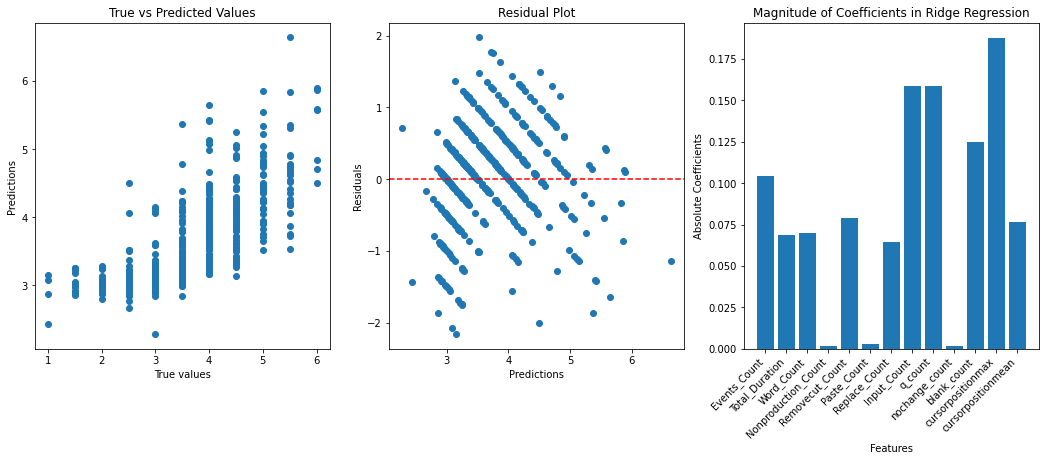

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].scatter(y_test, y_pred)
axes[0].set_xlabel("True values")
axes[0].set_ylabel("Predictions")
axes[0].set_title("True vs Predicted Values")

residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals)
axes[1].set_xlabel("Predictions")
axes[1].set_ylabel("Residuals")
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")


feature_names = X.columns
axes[2].bar(feature_names, np.abs(ridge.coef_))
axes[2].set_xlabel('Features')
axes[2].set_ylabel("Absolute Coefficients")
axes[2].set_title('Magnitude of Coefficients in Ridge Regression')
axes[2].set_xticklabels(feature_names, rotation=45, ha = "right")


Model Performance: The Ridge Regression model yields an R squared value of 0.51 and a RMSE of 0.688. This suggests that the model is a moderate fit. The R squared of 0.51 suggests that around 50% of the variance in the dependent variable (score)e is explained by the independent variable(s), and the other 50% is still unaccounted for. There is also a moderate association between the true values and the predictions as seen in the plot above. Generally, the points on the plot should fall along a diagonal line, indicating that the predicted values are close to the true values and we see that the points are somewhat along the diagonal line in the plot above. The spread of residuals is generally overall constant across most levels of predicted values, suggesting approximate homoscedasticity. There are also no significant outliers in the residuals plot. 


Model Interpretation: The plot above showcases the magnitudes of coefficients in ridge regression. In Ridge Regression, a larger magnitude of a coefficient means that the model is relying more heavily on that particular feature to make predictions. In this case, it appears that cursor position max, Input_Count, q_Count, and events_count are the features that the model is relying more heavily on to make make ths score prediction. It is possible that these features with larger coefficients might be more influential. Additionally, it looks like certain variables such as Nonproduction_Count, Replace_Count, and nonchange_count have absolute magnitudes that are relatively lower than the rest of the features, suggesting that they did not have significant influence in the model in making the prediction for score. 

2. Support Vector Machines

We will utilize the RBF kernel instead of the default linear kernel because we expect the relationships between the features and the score variable. The RBF kernel (also known as the Gaussian kernel) is a popular choice when the relationship is expected to be non-linear or when the data has complex patterns. It allows the SVM to model non-linear decision boundaries effectively. 

We will use parameter tuning on the regularization parameter (C) to identify the optimal C to use in the final SVM regression model. 

Optimal C:  2
R-squared (R2): 0.6023896931141928
Root Mean Squared Error: 0.6225496123497969


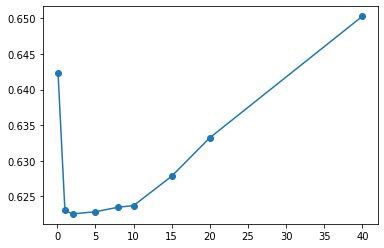

In [ ]:
from sklearn.svm import SVR
C_values = [0.1, 1, 2, 5, 8, 10, 15, 20, 40]
mse_values = []

for c in C_values:

    svm_regressor = SVR(kernel='rbf', C=c)
    svm_regressor.fit(X_train, y_train)
    y_pred = svm_regressor.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse_values.append(mse)



plt.plot(C_values, mse_values, marker='o')
optimal_index = np.argmin(mse_values)
optimal_C = C_values[optimal_index]
print("Optimal C: ", optimal_C)

svm_regressor = SVR(kernel='rbf', C=optimal_C)
svm_regressor.fit(X_train, y_train)
y_pred = svm_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2): {r2}')
print(f'Root Mean Squared Error: {rmse}')



Text(0, 0.5, 'Predicted Values')

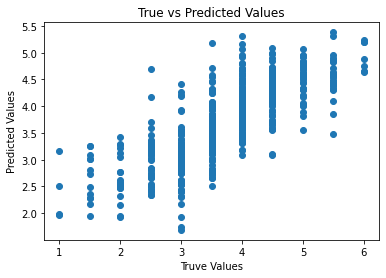

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("True vs Predicted Values")
plt.xlabel("Truve Values")
plt.ylabel("Predicted Values")

To enable interpretibility of this SVM model, we will assess feature importance using the permutation importance method to identify the important features used by the model in making the score predictions. To further analyze the impact of the most relevant features in the model, we will utilize partial dependence plots. 

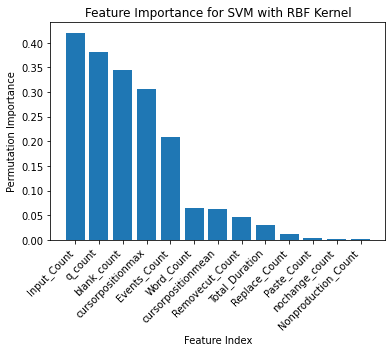

In [ ]:
# Perform permutation importance

from sklearn.inspection import permutation_importance
result = permutation_importance(svm_regressor, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]

# Plot feature importance
plt.bar(range(X.shape[1]), importance[sorted_idx])
plt.xticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Index')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance for SVM with RBF Kernel')
plt.xticks(rotation=45, ha='right')
plt.show()

One of the ways that we can interpret the effects of these features in the SVM model is through a partial dependence plot. Partial Dependence plots show how the predicted outcome changes as the value of a single feature varies, while keeping all other features constant.The y-axis of the PDP plot represents the predicted values (output) of the SVM regression model. The x-axis shows the values of the selected feature. The line in the plot illustrates how the predicted outcome changes as the feature value varies. A positive slope implies an increase in the selected feature leads to an increase in predicted values, while a negative slope indicates the opposite.

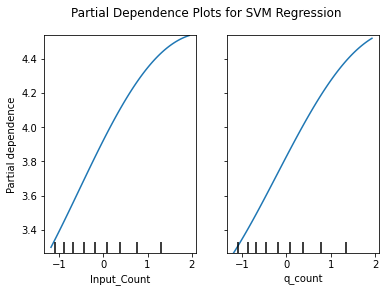

In [ ]:
from sklearn.inspection import plot_partial_dependence

# Assuming X_train and feature_names are available
plot_partial_dependence(svm_regressor, X_train, features=[7, 8], feature_names=feature_names)
plt.suptitle('Partial Dependence Plots for SVM Regression')
plt.show()

Model Performance: The SVM regression model yields a R squared value of 0.6 and RSME of 0.62. This is considerably better than the performance we were able to recieve with the previous ridge regression model. This suggests that the SVM regression model is a moderately strong fit. The R squared value of 0.62 suggests that the SVM model is a moderately strong fit. The R squared of 0.6 suggests that around 60 percent of the variance in the dependent variable (score)e is explained by the independent variable(s), and the other 40 percent is still unaccounted for. Additionally, the predicted vs true values plot also appears moderately strong as the overall trend is somewhat close to a diagonal indicating that in general, the predicted values are close to the true values. 


Model Interpretation: From the feature importance plot above, we can see that Input_Count, q_Count, blank_count, cursorpositionmax, and Events_counts variable are the variables that have high influence in the model when making the score predictions. As seen in the partial dependence plots for SVM regression, increasing Input_Count and q_Count greatly increases the score prediction in the model. This may suggest that activity of inputs or text change of qs are associated with higher essay scores. 

3. Random Forest Regression

We will first engage in the parameter tuning process for random forest. We will tune the following parameters. The criterion for the tuning will be mean squared error. 

1. n_estimators

2. max_depth

3. min_samples_split

4. min_samples_leaf

In [ ]:
#Hyperaparameters grid to search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Create the GridSearchCV object with mean squared error as scoring
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [23]:
rf_model = RandomForestRegressor(random_state = 42, max_depth = 10, min_samples_leaf=4, min_samples_split=5, n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2): {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared (R2): 0.5977897671970029
Root Mean Squared Error: 0.6261403734270747


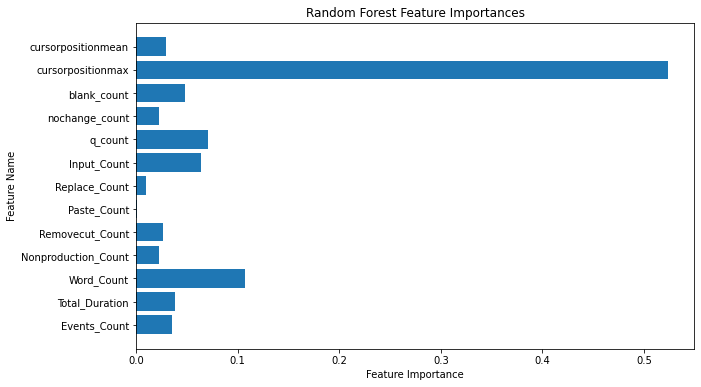

In [58]:
# Create a bar plot of feature importances
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = list(combined_dataframe.columns)[0:13]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importances")
plt.show()

In [59]:
combined_dataframe

,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean,score
0,2557,297243,256,120,417,0,7,2010,1940,120,436,1539,711.163473,3.5
1,2454,275391,323,254,260,1,1,1938,1698,254,432,1676,776.205786,3.5
2,4136,421201,404,175,439,0,7,3515,3257,175,615,2291,731.611702,6.0
3,1556,189596,206,99,151,1,1,1304,1146,99,281,1047,542.537275,2.0
4,2531,313702,252,72,517,0,0,1942,1964,72,397,1402,600.050968,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,4739,499670,461,189,960,0,2,3588,3605,189,813,1634,774.000633,3.5
2467,2604,214221,438,148,60,0,1,2395,1920,148,457,1877,1022.078725,4.0
2468,3063,231580,201,126,88,0,0,2849,1031,126,1879,2761,1309.085537,1.5
2469,3242,289439,413,71,276,0,0,2895,2593,71,490,2133,1192.640962,5.0


In [82]:
boundaries = [0, 3, 6]

In [83]:
combined_dataframe["score_category"] = pd.cut(combined_dataframe['score'], bins=[0, 3, 6], labels=[0, 1])

In [84]:
combined_dataframe["score"].value_counts()

4.0    501
3.5    486
4.5    402
3.0    336
2.5    201
5.0    179
5.5    128
2.0     92
1.5     69
6.0     37
1.0     35
0.5      5
Name: score, dtype: int64

In [85]:
X = combined_dataframe.drop(["score", "score_category"], axis = 1)
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
# Apply K-means clustering to the scaled data
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)


In [ ]:
X = combined_dataframe.drop("score", axis=1)
y = combined_dataframe["score"]

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()


In [86]:
combined_dataframe

,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean,score,score_category
0,2557,297243,256,120,417,0,7,2010,1940,120,436,1539,711.163473,3.5,1
1,2454,275391,323,254,260,1,1,1938,1698,254,432,1676,776.205786,3.5,1
2,4136,421201,404,175,439,0,7,3515,3257,175,615,2291,731.611702,6.0,1
3,1556,189596,206,99,151,1,1,1304,1146,99,281,1047,542.537275,2.0,0
4,2531,313702,252,72,517,0,0,1942,1964,72,397,1402,600.050968,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,4739,499670,461,189,960,0,2,3588,3605,189,813,1634,774.000633,3.5,1
2467,2604,214221,438,148,60,0,1,2395,1920,148,457,1877,1022.078725,4.0,1
2468,3063,231580,201,126,88,0,0,2849,1031,126,1879,2761,1309.085537,1.5,0
2469,3242,289439,413,71,276,0,0,2895,2593,71,490,2133,1192.640962,5.0,1


In [87]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.535194,-0.231284,-0.776975,-0.327442,0.073256,-0.201513,1.433032,-0.595495,-0.469006,-0.327442,-0.423050,-0.715135,-0.757438
1,-0.600445,-0.370037,-0.388390,-0.061269,-0.398442,0.629772,-0.220492,-0.655689,-0.679169,-0.061269,-0.437012,-0.573797,-0.614875
2,0.465103,0.555810,0.081392,-0.218192,0.139353,-0.201513,1.433032,0.662716,0.674737,-0.218192,0.201777,0.060674,-0.712618
3,-1.169328,-0.914808,-1.066964,-0.369156,-0.725926,0.629772,-0.220492,-1.185726,-1.158551,-0.369156,-0.964101,-1.222712,-1.127042
4,-0.551665,-0.126774,-0.800174,-0.422788,0.373700,-0.201513,-0.496080,-0.652345,-0.448163,-0.422788,-0.559185,-0.856472,-1.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.847104,1.054063,0.411979,-0.190383,1.704668,-0.201513,0.055095,0.723746,0.976956,-0.190383,0.892926,-0.617127,-0.619708
2467,-0.505420,-0.758447,0.278584,-0.271824,-0.999330,-0.201513,-0.220492,-0.273627,-0.486374,-0.271824,-0.349746,-0.366434,-0.075957
2468,-0.214643,-0.648223,-1.095963,-0.315524,-0.915206,-0.201513,-0.496080,0.105926,-1.258422,-0.315524,4.613962,0.545554,0.553120
2469,-0.101246,-0.280837,0.133590,-0.424774,-0.350371,-0.201513,-0.496080,0.144383,0.098089,-0.424774,-0.234555,-0.102329,0.297890


In [71]:
# Apply K-means clustering to the scaled data
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)


KMeans(n_clusters=6)

In [75]:
predicted_clusters

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
true_labels_encoded = [int(x) for x in true_labels_encoded]

In [88]:
# Create a confusion matrix
true_labels_encoded = list(combined_dataframe["score_category"])
predicted_clusters = KMeans(n_clusters=2).fit_predict(X_scaled)
conf_matrix = confusion_matrix(true_labels_encoded, predicted_clusters)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 55 683]
 [771 962]]


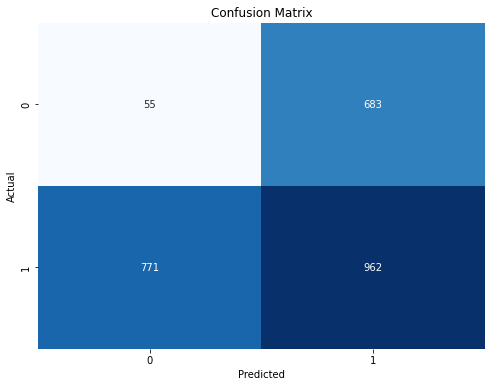

In [89]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [99]:
X

,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean
0,2557,297243,256,120,417,0,7,2010,1940,120,436,1539,711.163473
1,2454,275391,323,254,260,1,1,1938,1698,254,432,1676,776.205786
2,4136,421201,404,175,439,0,7,3515,3257,175,615,2291,731.611702
3,1556,189596,206,99,151,1,1,1304,1146,99,281,1047,542.537275
4,2531,313702,252,72,517,0,0,1942,1964,72,397,1402,600.050968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,4739,499670,461,189,960,0,2,3588,3605,189,813,1634,774.000633
2467,2604,214221,438,148,60,0,1,2395,1920,148,457,1877,1022.078725
2468,3063,231580,201,126,88,0,0,2849,1031,126,1879,2761,1309.085537
2469,3242,289439,413,71,276,0,0,2895,2593,71,490,2133,1192.640962


In [100]:
X = combined_dataframe.drop("score", axis=1)
y = combined_dataframe["score"]

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [101]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.535194,-0.231284,-0.776975,-0.327442,0.073256,-0.201513,1.433032,-0.595495,-0.469006,-0.327442,-0.423050,-0.715135,-0.757438
1,-0.600445,-0.370037,-0.388390,-0.061269,-0.398442,0.629772,-0.220492,-0.655689,-0.679169,-0.061269,-0.437012,-0.573797,-0.614875
2,0.465103,0.555810,0.081392,-0.218192,0.139353,-0.201513,1.433032,0.662716,0.674737,-0.218192,0.201777,0.060674,-0.712618
3,-1.169328,-0.914808,-1.066964,-0.369156,-0.725926,0.629772,-0.220492,-1.185726,-1.158551,-0.369156,-0.964101,-1.222712,-1.127042
4,-0.551665,-0.126774,-0.800174,-0.422788,0.373700,-0.201513,-0.496080,-0.652345,-0.448163,-0.422788,-0.559185,-0.856472,-1.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.847104,1.054063,0.411979,-0.190383,1.704668,-0.201513,0.055095,0.723746,0.976956,-0.190383,0.892926,-0.617127,-0.619708
2467,-0.505420,-0.758447,0.278584,-0.271824,-0.999330,-0.201513,-0.220492,-0.273627,-0.486374,-0.271824,-0.349746,-0.366434,-0.075957
2468,-0.214643,-0.648223,-1.095963,-0.315524,-0.915206,-0.201513,-0.496080,0.105926,-1.258422,-0.315524,4.613962,0.545554,0.553120
2469,-0.101246,-0.280837,0.133590,-0.424774,-0.350371,-0.201513,-0.496080,0.144383,0.098089,-0.424774,-0.234555,-0.102329,0.297890


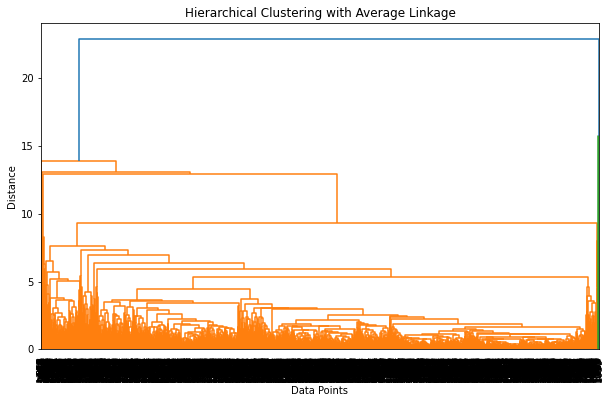

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Generate synthetic data


# Perform hierarchical clustering with average linkage
linkage_matrix = linkage(X_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.title('Hierarchical Clustering with Average Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


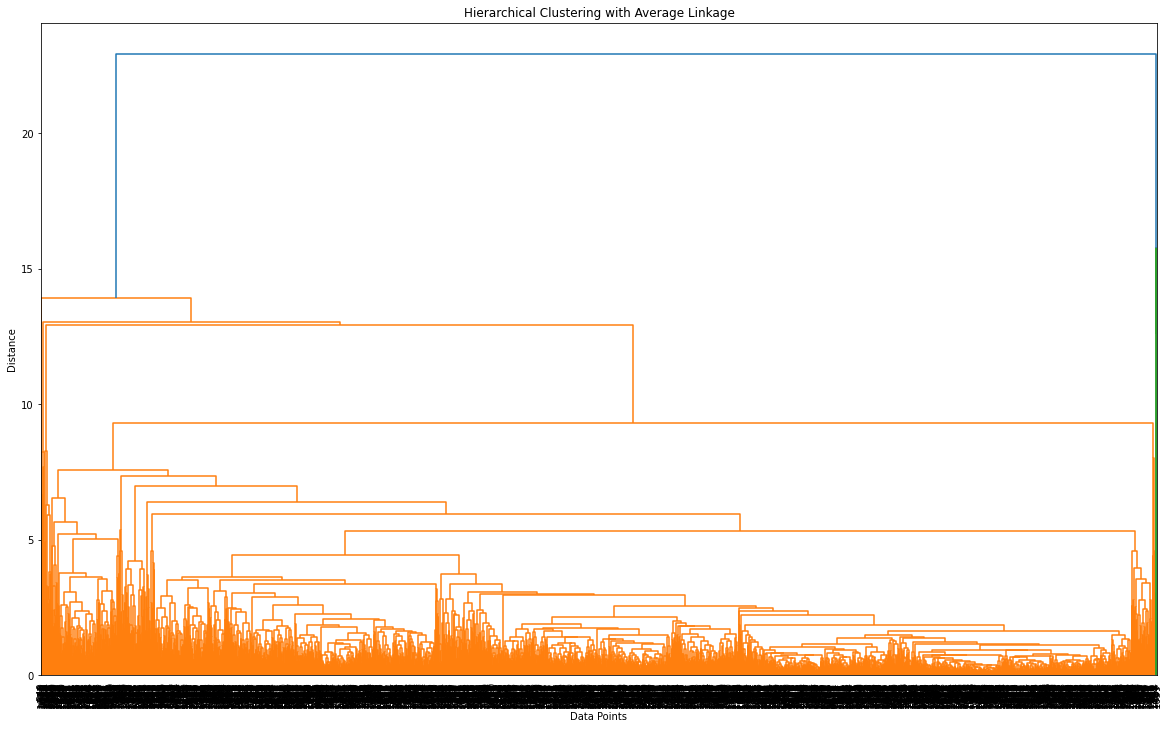

In [103]:
# Plot the dendrogram
plt.figure(figsize=(20, 12))
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.title('Hierarchical Clustering with Average Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

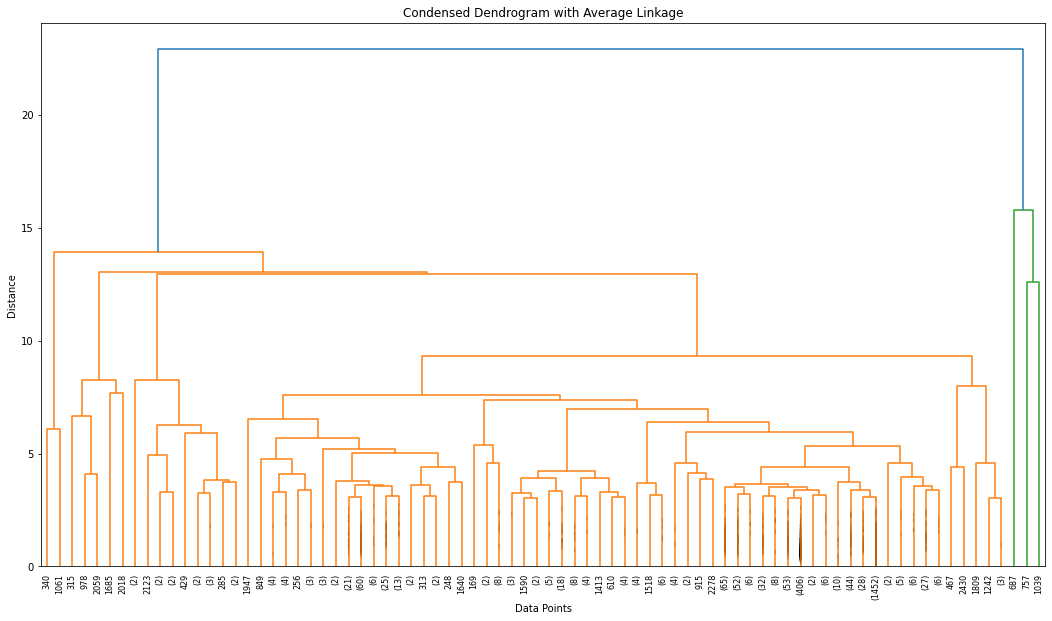

In [107]:
# Plot the condensed dendrogram
plt.figure(figsize=(18, 10))
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=8, truncate_mode='lastp', p=80, show_contracted=True)
plt.title('Condensed Dendrogram with Average Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [116]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean')
cluster_labels = model.fit_predict(X_scaled)

In [151]:
combined_dataframe["score_category"] = pd.cut(combined_dataframe['score'], bins=[0, 1, 2, 3, 4, 5, 6], labels=[0, 1, 2, 3, 4, 5])

In [152]:
combined_dataframe

,Events_Count,Total_Duration,Word_Count,Nonproduction_Count,Removecut_Count,Paste_Count,Replace_Count,Input_Count,q_count,nochange_count,blank_count,cursorpositionmax,cursorpositionmean,score,score_category
0,2557,297243,256,120,417,0,7,2010,1940,120,436,1539,711.163473,3.5,3
1,2454,275391,323,254,260,1,1,1938,1698,254,432,1676,776.205786,3.5,3
2,4136,421201,404,175,439,0,7,3515,3257,175,615,2291,731.611702,6.0,5
3,1556,189596,206,99,151,1,1,1304,1146,99,281,1047,542.537275,2.0,1
4,2531,313702,252,72,517,0,0,1942,1964,72,397,1402,600.050968,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,4739,499670,461,189,960,0,2,3588,3605,189,813,1634,774.000633,3.5,3
2467,2604,214221,438,148,60,0,1,2395,1920,148,457,1877,1022.078725,4.0,3
2468,3063,231580,201,126,88,0,0,2849,1031,126,1879,2761,1309.085537,1.5,1
2469,3242,289439,413,71,276,0,0,2895,2593,71,490,2133,1192.640962,5.0,4


In [153]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.535194,-0.231284,-0.776975,-0.327442,0.073256,-0.201513,1.433032,-0.595495,-0.469006,-0.327442,-0.423050,-0.715135,-0.757438
1,-0.600445,-0.370037,-0.388390,-0.061269,-0.398442,0.629772,-0.220492,-0.655689,-0.679169,-0.061269,-0.437012,-0.573797,-0.614875
2,0.465103,0.555810,0.081392,-0.218192,0.139353,-0.201513,1.433032,0.662716,0.674737,-0.218192,0.201777,0.060674,-0.712618
3,-1.169328,-0.914808,-1.066964,-0.369156,-0.725926,0.629772,-0.220492,-1.185726,-1.158551,-0.369156,-0.964101,-1.222712,-1.127042
4,-0.551665,-0.126774,-0.800174,-0.422788,0.373700,-0.201513,-0.496080,-0.652345,-0.448163,-0.422788,-0.559185,-0.856472,-1.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.847104,1.054063,0.411979,-0.190383,1.704668,-0.201513,0.055095,0.723746,0.976956,-0.190383,0.892926,-0.617127,-0.619708
2467,-0.505420,-0.758447,0.278584,-0.271824,-0.999330,-0.201513,-0.220492,-0.273627,-0.486374,-0.271824,-0.349746,-0.366434,-0.075957
2468,-0.214643,-0.648223,-1.095963,-0.315524,-0.915206,-0.201513,-0.496080,0.105926,-1.258422,-0.315524,4.613962,0.545554,0.553120
2469,-0.101246,-0.280837,0.133590,-0.424774,-0.350371,-0.201513,-0.496080,0.144383,0.098089,-0.424774,-0.234555,-0.102329,0.297890


In [177]:
true_labels_encoded = list(combined_dataframe["score_category"])
predicted_clusters = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean').fit_predict(X_scaled)
confusion_matrix(np.array(true_labels_encoded), np.array(predicted_clusters))

TypeError: 'numpy.ndarray' object is not callable

In [179]:
confusion_matrix([[2, 0, 2, 2, 0, 1]], [[2, 0, 2, 2, 0, 1]])

TypeError: 'numpy.ndarray' object is not callable

In [171]:
predicted_clusters = list(predicted_clusters)
true_labels_encoded = list(true_labels_encoded)
confusion_matrix(predicted_clusters, true_labels_encoded)

TypeError: 'numpy.ndarray' object is not callable

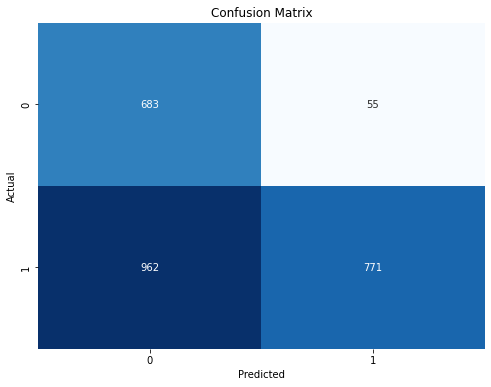

In [126]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [127]:
confusion_matrix = conf_matrix
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

# Calculate specificity
specificity = TN / (TN + FP)

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate sensitivity (recall)
sensitivity = TP / (TP + FN)

# Display the results
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("Sensitivity (Recall):", sensitivity)

Specificity: 0.9254742547425474
Accuracy: 0.5884257385673817
Sensitivity (Recall): 0.4448932487016734
